In [1]:
import numpy as np

# Define the dimensions of the rectangular matrix
rows = 5
columns = 3

# Generate a random rectangular matrix of size rows x columns
A = np.random.rand(rows, columns)

# Print the matrix A
print("Matrix A:")
print(A)

Matrix A:
[[0.60745134 0.63215111 0.53520222]
 [0.25929457 0.8233929  0.75635399]
 [0.29642365 0.05479297 0.05438479]
 [0.09829778 0.84971858 0.60343176]
 [0.82002957 0.82504848 0.87666828]]


In [4]:
# Calculate the rank of A
rank_A = np.linalg.matrix_rank(A)

# Calculate the trace of A
trace_A = np.trace(A)

# Print the rank and trace of A
print("Rank of A:", rank_A)
print("Trace of A:", trace_A)

Rank of A: 3
Trace of A: 1.4852290227176768


In [5]:
# Try to calculate the determinant of A
try:
    determinant_A = np.linalg.det(A)
    print("Determinant of A:", determinant_A)
except np.linalg.LinAlgError:
    print("Matrix A is not square. Determinant does not exist.")

Matrix A is not square. Determinant does not exist.


In [6]:
# Check if A is square
if A.shape[0] == A.shape[1]:
    # Check if A is non-singular (i.e., its determinant is non-zero)
    if np.linalg.det(A) != 0:
        # Invert matrix A
        A_inverse = np.linalg.inv(A)
        print("Inverse of A:")
        print(A_inverse)
    else:
        print("Matrix A is singular. Inverse does not exist.")
else:
    print("Matrix A is not square. Inverse does not exist.")

Matrix A is not square. Inverse does not exist.


In [7]:
# Calculate the pseudoinverse of A
A_pseudoinverse = np.linalg.pinv(A)

# Print the pseudoinverse of A
print("Pseudoinverse of A:")
print(A_pseudoinverse)

Pseudoinverse of A:
[[ 1.35352354 -1.10586054  1.0983066  -0.19323387  0.19264472]
 [ 2.62274737 -1.7324568   1.43067373  3.02041635 -2.27426005]
 [-3.51820105  3.02023867 -2.27574152 -2.90232002  2.82170269]]


In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine, load_iris

# Load DataSet
wine_data = load_wine()
X, y = wine_data['data'], wine_data['target']

print(X.shape)
print(y.shape)


(178, 13)
(178,)


Eigenvalues and eigenvectors of $A^T A$ and $AA^T$ have a unique relationship, particularly in the context of singular value decomposition (SVD). Here are the key points and differences:

**Eigenvalues:**

- Both $A^T A$ and $AA^T$ have the same non-zero eigenvalues.
- These eigenvalues are the squares of the singular values of $A$.
- If $A$ is a $m \times n$ matrix, then $A^T A$ (size $n \times n$) and $AA^T$ (size $m \times m$) may have a different number of zero eigenvalues due to their different sizes.

**Eigenvectors:**

- The eigenvectors of $A^T A$ are called the right-singular vectors of $A$, while the eigenvectors of $AA^T$ are the left-singular vectors of $A$.
- These eigenvectors are generally different but are related through the matrix $A$. Specifically, if $v$ is an eigenvector of $A^T A$, then $Av$ is a corresponding eigenvector of $AA^T$, and vice versa.

**Dimensionality and Orthogonality:**

- The eigenvectors of $A^T A$ form an orthogonal basis for $\mathbb{R}^n$, and the eigenvectors of $AA^T$ form an orthogonal basis for $\mathbb{R}^m$.
- This orthogonality is a critical aspect in applications like principal component analysis (PCA).

**Differences in Applications:**

- In practical terms, whether one uses $A^T A$ or $AA^T$ can depend on the dimensions of $A$. For instance, in PCA, if $n$ (number of features) is much larger than $m$ (number of observations), one might prefer to work with $AA^T$ due to computational efficiency.

**Zero Eigenvalues:**

- In cases where $A$ is not square, either $A^T A$ or $AA^T$ (or both) will have zero eigenvalues. The number of zero eigenvalues reflects the difference in dimensions of $A$.

In summary, while $A^T A$ and $AA^T$ share the same non-zero eigenvalues (which are the squared singular values of $A$), their eigenvectors are different and form orthogonal bases in their respective dimensional spaces. This relationship is fundamental in linear algebra and has numerous applications in fields like data science and machine learning.

2.

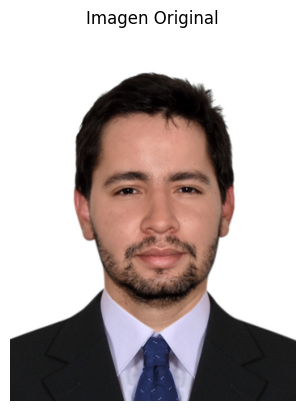

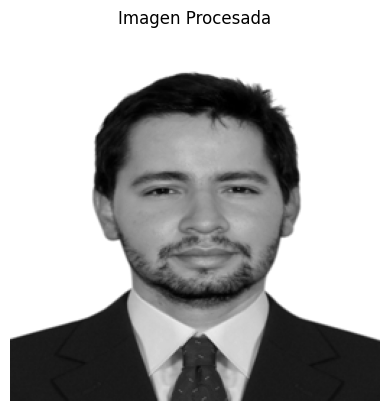

In [14]:
from PIL import Image
import numpy as np
from io import BytesIO

import requests
import matplotlib.pyplot as plt

# Cargar la imagen desde la biblioteca content de Colab
imagen_colab = Image.open('C:/Users/Byron/Desktop/Prueba_ML/unsupervised/dim_red/cv_photo.jpg')

# Convertir la imagen a escala de grises
imagen_grayscale = imagen_colab.convert('L')

# Redimensionar a 256x256
imagen_redimensionada = imagen_grayscale.resize((256, 256))

# Mostrar la imagen original
plt.imshow(np.asarray(imagen_colab), cmap='gray')
plt.title('Imagen Original')
plt.axis('off')
plt.show()

# Mostrar la imagen en escala de grises y redimensionada
plt.imshow(np.asarray(imagen_redimensionada), cmap='gray')
plt.title('Imagen Procesada')
plt.axis('off')
plt.show()

# Guardar la imagen procesada
imagen_redimensionada.save('imagen_uno_procesada.jpg')

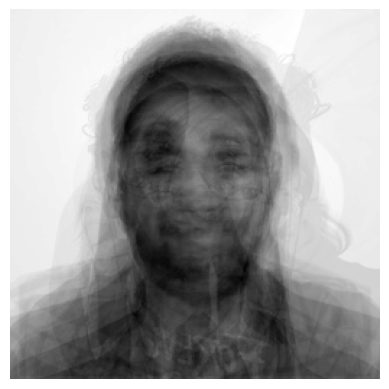

In [13]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Obtener la lista de archivos en la carpeta
folder_path = 'C:/Users/Byron/Desktop/Prueba_ML/unsupervised/ML2'
image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('.jpg', '.jpeg'))]

# Cargar y convertir las imágenes en matrices numpy
images = [np.array(Image.open(img_file).convert('L')) for img_file in image_files]

# Calcular la cara promedio
average_face = np.mean(images, axis=0)

# Convertir la matriz promedio en una imagen
average_face_img = Image.fromarray(np.uint8(average_face))

# Visualizar la cara promedio
plt.imshow(average_face_img, cmap='gray')
plt.axis('off')
plt.show()

# Guardar la imagen procesada
average_face_img.save('imagen_promedio.jpg')


In [17]:
import numpy as np
from PIL import Image

# Función para calcular la distancia euclidiana entre dos imágenes
def distancia_euclidiana(imagen1, imagen2):
    # Convertir las imágenes en matrices numpy
    matriz_imagen1 = np.array(imagen1)
    matriz_imagen2 = np.array(imagen2)

    # Calcular la diferencia de píxeles entre las imágenes
    diferencia = matriz_imagen1 - matriz_imagen2

    # Calcular la distancia euclidiana
    distancia = np.sqrt(np.sum(diferencia ** 2))

    return distancia

# Rutas de archivo de las imágenes original y promedio
ruta_imagen_original = 'C:/Users/Byron/Desktop/Prueba_ML/unsupervised/imagen_uno_procesada.jpg'
ruta_imagen_promedio = 'C:/Users/Byron/Desktop/Prueba_ML/unsupervised/imagen_promedio.jpg'

# Cargar la imagen original
imagen_original = Image.open(ruta_imagen_original).convert('L')  # Convertir a escala de grises si es necesario

# Cargar la imagen promedio
imagen_promedio = Image.open(ruta_imagen_promedio).convert('L')  # Convertir a escala de grises si es necesario

# Calcular la distancia euclidiana entre la imagen original y la imagen promedio
distancia = distancia_euclidiana(imagen_original, imagen_promedio)

print(f"La distancia euclidiana entre la imagen original y la imagen promedio es: {distancia}")


La distancia euclidiana entre la imagen original y la imagen promedio es: 2601.0693954602593


3.

4.

This code calculates the MSE between the original and reconstructed images for each iteration of the SVD process. The MSE values are then plotted to visualize how the error changes as more singular values are used in the reconstruction. This allows you to determine the point where the image is appropriately reproduced based on the MSE values.

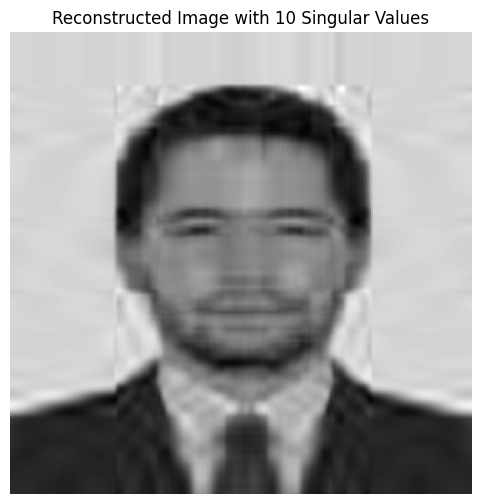

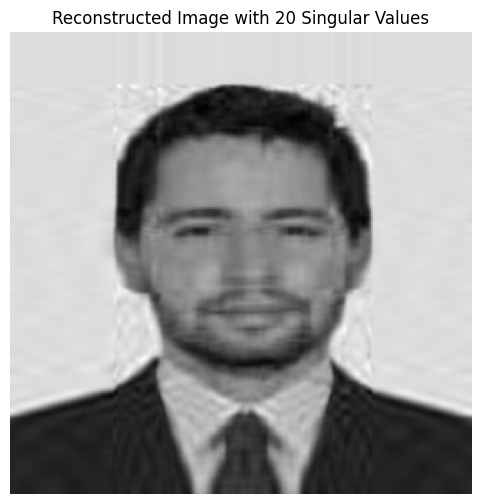

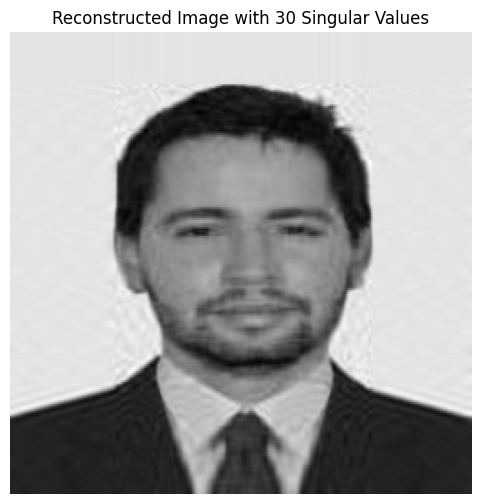

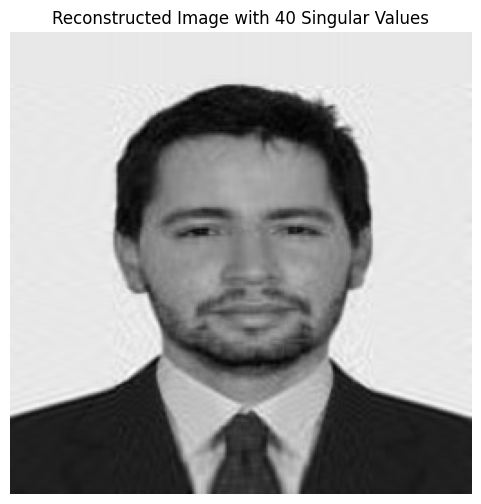

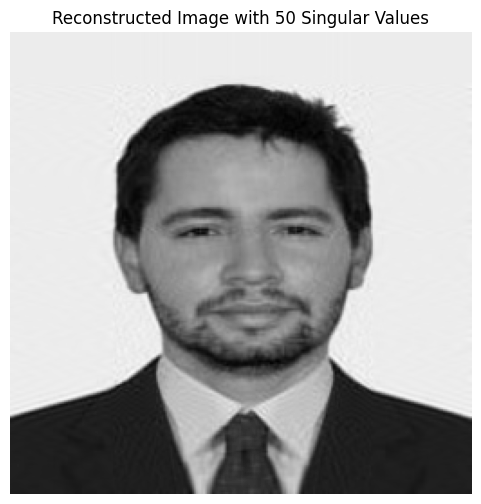

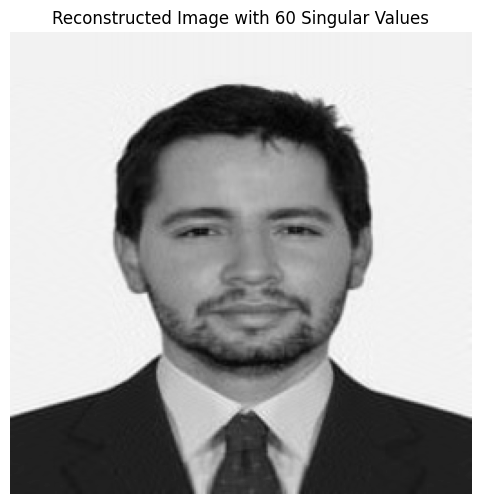

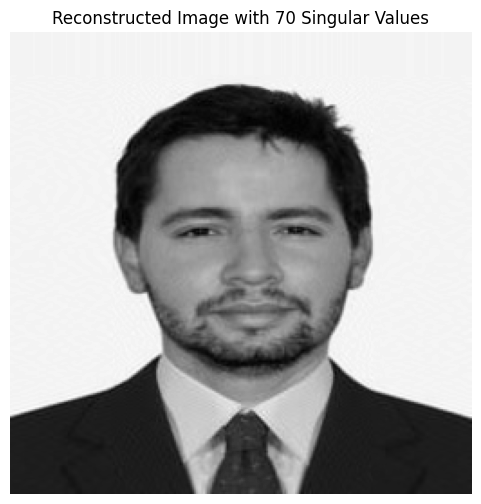

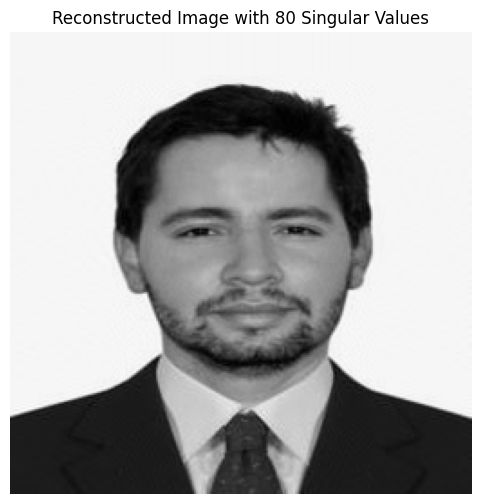

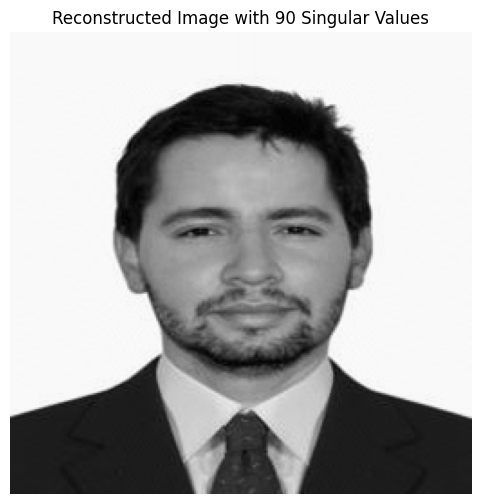

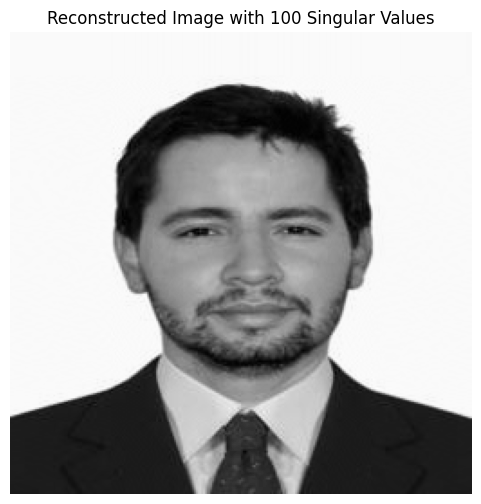

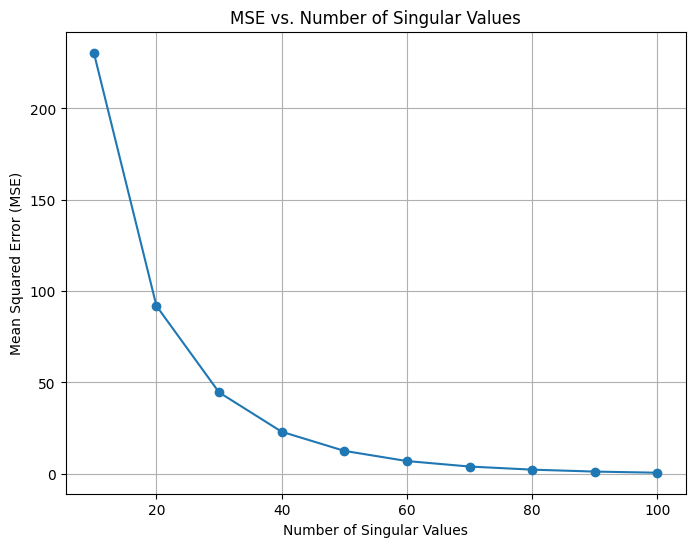

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from dim_red.SVD import SVD  # Import the SVD class from the separate file

# Load your face image
face_path = 'C:/Users/Byron/Desktop/Prueba_ML/unsupervised/imagen_uno_procesada.jpg'
face_image = np.array(Image.open(face_path).convert('L'))

# Initialize SVD
initial_components = 10
svd = SVD(initial_components)

# Fit SVD to the face image
svd.fit(face_image)

# Apply SVD with progressively increasing number of components
num_iterations = 10
mse_values = []

for i in range(1, num_iterations + 1):
    # Update the number of singular values to use for transformation
    svd.set_components(initial_components)
    
    # Transform and then inverse transform the image using the current number of singular values
    transformed_image = svd.transform(face_image)
    reconstructed_image = svd.inverse_transform(transformed_image)

    # Calculate Mean Squared Error (MSE)
    mse = np.mean((face_image - reconstructed_image) ** 2)
    mse_values.append(mse)

    # Plot the reconstructed image
    plt.figure(figsize=(6, 6))
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'Reconstructed Image with {initial_components} Singular Values')
    plt.axis('off')
    plt.show()

    # Increase the number of initial components by 10 for the next iteration
    initial_components += 10

# Plot the MSE values
plt.figure(figsize=(8, 6))
plt.plot(range(10, num_iterations * 10 + 1, 10), mse_values, marker='o')  # Adjusted x-axis for increments of 10
plt.xlabel('Number of Singular Values')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Number of Singular Values')
plt.grid(True)
plt.show()



If the Mean Squared Error (MSE) plot is a straight horizontal line, it implies that adding more singular values does not significantly improve the reconstruction quality. This behavior may occur if the images are relatively simple or low in complexity, and capturing most of the information requires only a few singular values.

In summary, a straight horizontal line in the MSE plot suggests that adding more singular values does not significantly improve the reconstruction quality, either because the images are relatively simple or because the SVD model has limitations in capturing the underlying variability in the data.

5.

In [21]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Convert string labels to integers
y = y.astype(np.uint8)

# Filter 0s and 8s
X_08 = X[(y == 0) | (y == 8)]
y_08 = y[(y == 0) | (y == 8)]

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_08, y_08, test_size=0.2, random_state=42)

# Train a logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


c:\Users\Byron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy: 0.9887108521485798


c:\Users\Byron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: The accuracy of the logistic regression model on the test set serves as a baseline performance metric. It represents the proportion of correctly classified samples out of the total samples. The higher the accuracy, the better the model's performance.

Imbalance: Since you're only distinguishing between 0s and 8s, there might be class imbalance, especially if one class (e.g., 0s) is more prevalent than the other (e.g., 8s). This imbalance can affect the accuracy and interpretation of the results.

Baseline for Comparison: The baseline performance achieved by the logistic regression model serves as a reference point for evaluating the performance of more complex models or alternative approaches. If more advanced models fail to outperform the baseline significantly, it suggests that the problem might be relatively simple or that the data might not contain sufficient information to improve performance further.

Interpretability: Logistic regression provides interpretable coefficients, which can offer insights into the relationship between the input features (pixel values) and the target classes (0s and 8s). Understanding these coefficients can help interpret the model's decisions and identify important features for classification.